In [128]:
import pandas as pd
import numpy as np

from datetime import datetime
import matplotlib.pyplot as plt


In [129]:
dataset = pd.read_csv('borhci.csv')

In [130]:
dataset.head()

,Date,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,01/09/1991,672,18,11.3,148.407080,362.908461,0.0,408.938053,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01/10/1991,1087,18,29.0,403.517241,513.944398,0.0,785.137931,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01/11/1991,928,23,29.8,505.671141,380.992112,0.0,1327.248322,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01/12/1991,863,26,25.2,742.777778,371.964548,0.0,1996.904762,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/1992,1050,32,25.6,847.812500,375.586205,0.0,2257.304688,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
dataset.shape

(280, 15)

In [132]:
dataset['Date'].head()

0    01/09/1991
1    01/10/1991
2    01/11/1991
3    01/12/1991
4    01/01/1992
Name: Date, dtype: object

In [133]:
data=pd.to_datetime(dataset['Date'])

In [138]:
#dataset.head()
dataset=dataset.set_index(['Date'])


In [139]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
Date,,,,,,,,,,,,,,
01/09/1991,672,18,11.3,148.407080,362.908461,0.0,408.938053,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/10/1991,1087,18,29.0,403.517241,513.944398,0.0,785.137931,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/11/1991,928,23,29.8,505.671141,380.992112,0.0,1327.248322,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/12/1991,863,26,25.2,742.777778,371.964548,0.0,1996.904762,0.0,NaN,NaN,NaN,NaN,NaN,NaN
01/01/1992,1050,32,25.6,847.812500,375.586205,0.0,2257.304688,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#dataset=dataset.drop('Date', axis=1)
dataset = dataset.drop((c for c in dataset.columns[-6:]), axis=1)

In [141]:
dataset.to_csv('borihci.csv')

In [142]:
dataset.head()

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
Date,,,,,,,,
01/09/1991,672,18,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087,18,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928,23,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863,26,25.2,742.777778,371.964548,0.0,1996.904762,0.0
01/01/1992,1050,32,25.6,847.812500,375.586205,0.0,2257.304688,0.0


In [143]:
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
#groups = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#i = 1
# plot each column
'''plt.figure(figsize=(50,100))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()'''

"plt.figure(figsize=(50,100))\nfor group in groups:\n\tplt.subplot(len(groups), 1, i)\n\tplt.plot(values[:, group])\n\tplt.title(dataset.columns[group], y=0.5, loc='right')\n\ti += 1\nplt.show()"

In [144]:
#dataset.values

In [145]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = pd.read_csv('borihci.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[14,15,16,17,18,22,23,
           #                    24,25,26,27]], axis=1, inplace=True)
#print(reframed.head())

In [146]:
reframed[reframed.columns[2]].head()
reframed.shape

(279, 16)

In [147]:
# split into train and test sets
values = reframed.values
n_train_months = (21*12)
train = values[:n_train_months, :]
test = values[n_train_months:, :]
# split into input and outputs
train_X, train_y = train[:, :-8], train[:, -8:]
test_X, test_y = test[:, :-8], test[:, -8:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(252, 1, 8) (252, 8) (27, 1, 8) (27, 8)


Train on 252 samples, validate on 27 samples
Epoch 1/500
 - 10s - loss: 0.4177 - val_loss: 0.2964
Epoch 2/500
 - 0s - loss: 0.3166 - val_loss: 0.2546
Epoch 3/500
 - 0s - loss: 0.2448 - val_loss: 0.2445
Epoch 4/500
 - 0s - loss: 0.2143 - val_loss: 0.2329
Epoch 5/500
 - 0s - loss: 0.1994 - val_loss: 0.2198
Epoch 6/500
 - 0s - loss: 0.1912 - val_loss: 0.2122
Epoch 7/500
 - 0s - loss: 0.1860 - val_loss: 0.2080
Epoch 8/500
 - 0s - loss: 0.1709 - val_loss: 0.2009
Epoch 9/500
 - 0s - loss: 0.1604 - val_loss: 0.1970
Epoch 10/500
 - 0s - loss: 0.1476 - val_loss: 0.1870
Epoch 11/500
 - 0s - loss: 0.1410 - val_loss: 0.1829
Epoch 12/500
 - 0s - loss: 0.1339 - val_loss: 0.1749
Epoch 13/500
 - 0s - loss: 0.1277 - val_loss: 0.1684
Epoch 14/500
 - 0s - loss: 0.1226 - val_loss: 0.1661
Epoch 15/500
 - 0s - loss: 0.1218 - val_loss: 0.1582
Epoch 16/500
 - 0s - loss: 0.1150 - val_loss: 0.1522
Epoch 17/500
 - 0s - loss: 0.1159 - val_loss: 0.1524
Epoch 18/500
 - 0s - loss: 0.1154 - val_loss: 0.1454
Epoch 19/

Epoch 154/500
 - 0s - loss: 0.0979 - val_loss: 0.1155
Epoch 155/500
 - 0s - loss: 0.0987 - val_loss: 0.1219
Epoch 156/500
 - 0s - loss: 0.0963 - val_loss: 0.1183
Epoch 157/500
 - 0s - loss: 0.0943 - val_loss: 0.1169
Epoch 158/500
 - 0s - loss: 0.0977 - val_loss: 0.1226
Epoch 159/500
 - 0s - loss: 0.0947 - val_loss: 0.1170
Epoch 160/500
 - 0s - loss: 0.0963 - val_loss: 0.1176
Epoch 161/500
 - 0s - loss: 0.0984 - val_loss: 0.1251
Epoch 162/500
 - 0s - loss: 0.0997 - val_loss: 0.1175
Epoch 163/500
 - 0s - loss: 0.0975 - val_loss: 0.1179
Epoch 164/500
 - 0s - loss: 0.0992 - val_loss: 0.1219
Epoch 165/500
 - 0s - loss: 0.0957 - val_loss: 0.1167
Epoch 166/500
 - 0s - loss: 0.1001 - val_loss: 0.1187
Epoch 167/500
 - 0s - loss: 0.0926 - val_loss: 0.1246
Epoch 168/500
 - 0s - loss: 0.0967 - val_loss: 0.1176
Epoch 169/500
 - 0s - loss: 0.0985 - val_loss: 0.1148
Epoch 170/500
 - 0s - loss: 0.0974 - val_loss: 0.1243
Epoch 171/500
 - 0s - loss: 0.0958 - val_loss: 0.1162
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0956 - val_loss: 0.1166
Epoch 307/500
 - 0s - loss: 0.0941 - val_loss: 0.1195
Epoch 308/500
 - 0s - loss: 0.0935 - val_loss: 0.1224
Epoch 309/500
 - 0s - loss: 0.0959 - val_loss: 0.1167
Epoch 310/500
 - 0s - loss: 0.0942 - val_loss: 0.1167
Epoch 311/500
 - 0s - loss: 0.0940 - val_loss: 0.1209
Epoch 312/500
 - 0s - loss: 0.0926 - val_loss: 0.1173
Epoch 313/500
 - 0s - loss: 0.0977 - val_loss: 0.1186
Epoch 314/500
 - 0s - loss: 0.0915 - val_loss: 0.1205
Epoch 315/500
 - 0s - loss: 0.0965 - val_loss: 0.1182
Epoch 316/500
 - 0s - loss: 0.0924 - val_loss: 0.1159
Epoch 317/500
 - 0s - loss: 0.0914 - val_loss: 0.1196
Epoch 318/500
 - 0s - loss: 0.0955 - val_loss: 0.1200
Epoch 319/500
 - 0s - loss: 0.0954 - val_loss: 0.1176
Epoch 320/500
 - 0s - loss: 0.0928 - val_loss: 0.1166
Epoch 321/500
 - 0s - loss: 0.0944 - val_loss: 0.1177
Epoch 322/500
 - 0s - loss: 0.0908 - val_loss: 0.1196
Epoch 323/500
 - 0s - loss: 0.0933 - val_loss: 0.1177
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0933 - val_loss: 0.1136
Epoch 459/500
 - 0s - loss: 0.0956 - val_loss: 0.1168
Epoch 460/500
 - 0s - loss: 0.0914 - val_loss: 0.1191
Epoch 461/500
 - 0s - loss: 0.0909 - val_loss: 0.1168
Epoch 462/500
 - 0s - loss: 0.0885 - val_loss: 0.1148
Epoch 463/500
 - 0s - loss: 0.0915 - val_loss: 0.1151
Epoch 464/500
 - 0s - loss: 0.0884 - val_loss: 0.1172
Epoch 465/500
 - 0s - loss: 0.0912 - val_loss: 0.1180
Epoch 466/500
 - 0s - loss: 0.0943 - val_loss: 0.1150
Epoch 467/500
 - 0s - loss: 0.0900 - val_loss: 0.1182
Epoch 468/500
 - 0s - loss: 0.0912 - val_loss: 0.1210
Epoch 469/500
 - 0s - loss: 0.0950 - val_loss: 0.1153
Epoch 470/500
 - 0s - loss: 0.0917 - val_loss: 0.1181
Epoch 471/500
 - 0s - loss: 0.0955 - val_loss: 0.1170
Epoch 472/500
 - 0s - loss: 0.0935 - val_loss: 0.1151
Epoch 473/500
 - 0s - loss: 0.0949 - val_loss: 0.1163
Epoch 474/500
 - 0s - loss: 0.0933 - val_loss: 0.1143
Epoch 475/500
 - 0s - loss: 0.0890 - val_loss: 0.1170
Epoch 476/500
 - 0s - loss: 

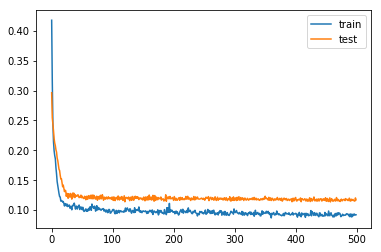

In [148]:
# design network
model = Sequential()
model.add(LSTM(200,activation = 'relu',input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(8,activation = 'relu'))
model.add(Dropout(0.02))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=12, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [149]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:,8:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,4:7]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 8))
inv_y = concatenate((test_y, test_X[:,8:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,4:7]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 333.328


In [150]:
yhat.shape[0]

27

In [151]:
i = 0
h = int(yhat.shape[0])
while i < h:
    x = yhat
    x = x.reshape((x.shape[0], 1, x.shape[1]))
    yhat = model.predict(x)
    i=i+1

In [152]:
yhat.shape

(27, 8)

In [153]:
test_X.shape

(27, 8)

In [154]:
xhat = yhat
xhat = concatenate((xhat, test_X[:,8:]), axis=1)
xhat = scaler.inverse_transform(xhat)
hcihat = xhat[:,4:7]

print(hcihat)

[[ 287.82675    0.      2271.4302 ]
 [ 287.3787     0.      2273.7341 ]
 [ 290.9259     0.      2261.8457 ]
 [ 295.1277     0.      2246.2412 ]
 [ 283.02493    0.      2275.957  ]
 [ 283.27234    0.      2280.3313 ]
 [ 280.2685     0.      2281.871  ]
 [ 281.33167    0.      2283.2988 ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [ 276.50797    0.      2279.6992 ]
 [   0.         0.         0.     ]
 [ 288.74646    0.      2276.4468 ]
 [ 280.29993    0.      2282.3875 ]
 [ 280.41693    0.      2284.0618 ]
 [ 281.05838    0.      2288.968  ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]
 [   0.         0.         0.     ]]


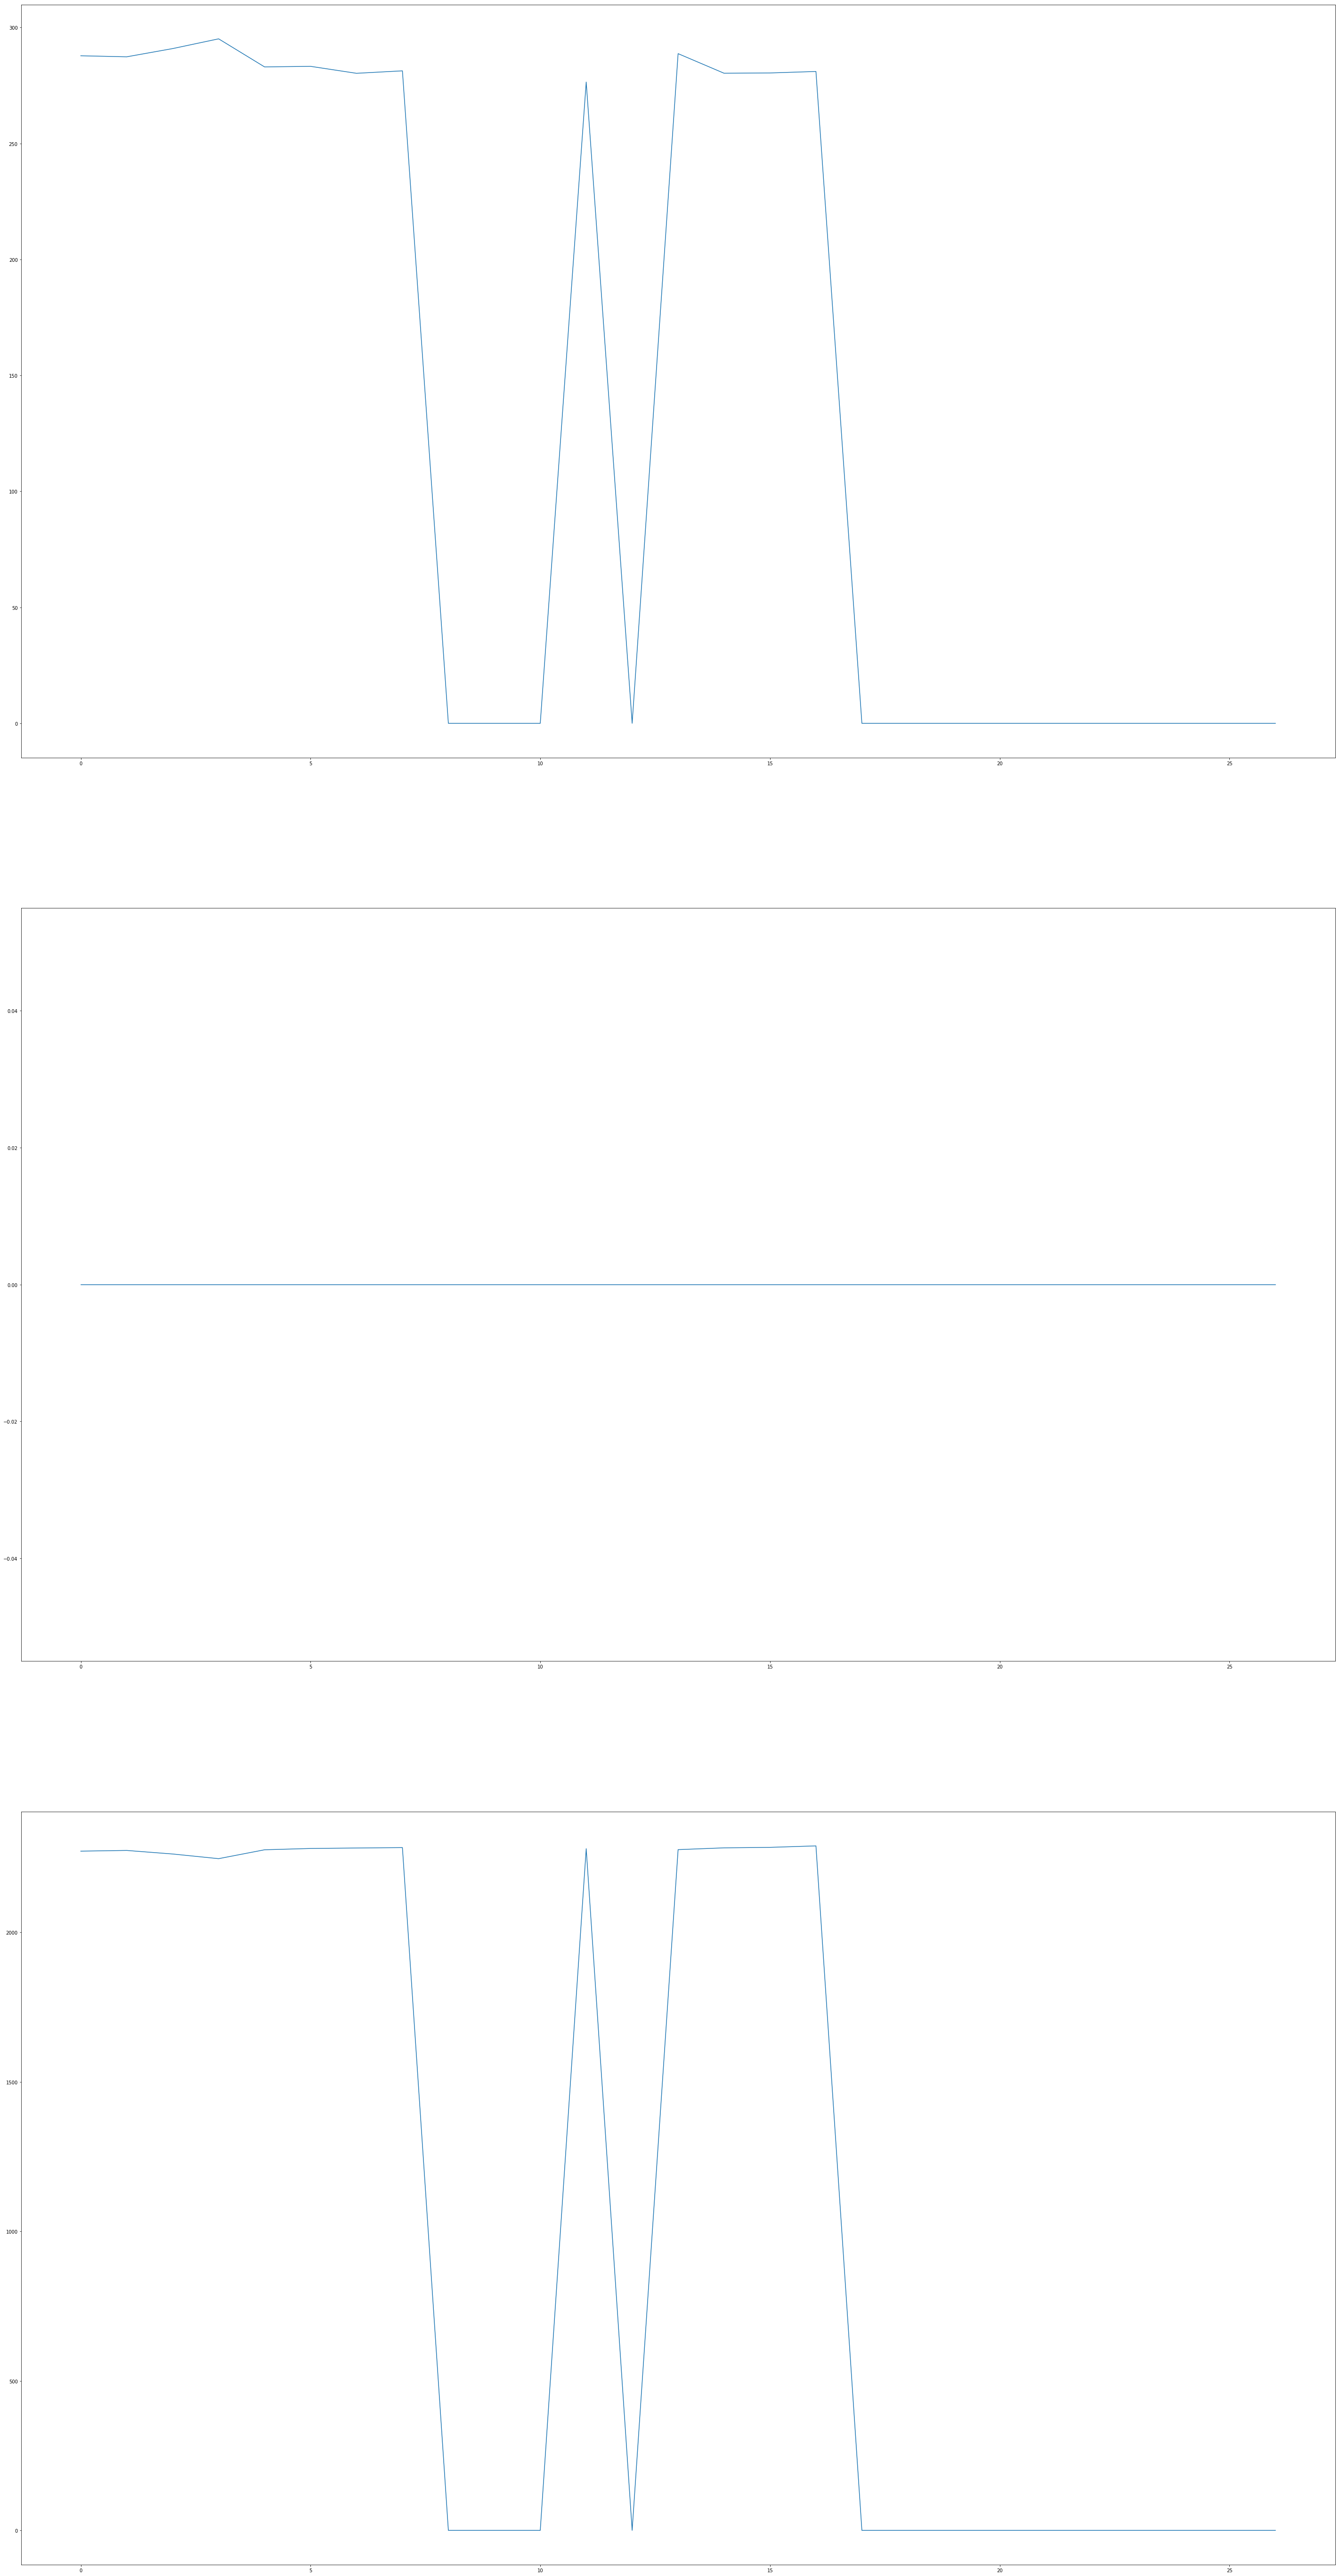

In [155]:
groups = [0,1,2]
i = 1
# plot each column
plt.figure(figsize=(50,100))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(hcihat[:, group])
	#plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [172]:
new = dataset

In [173]:
new.shape

(280, 8)

In [174]:
new.columns

Index(['Monthlyprod.Thp', 'Monthlyprod.Bean', 'Monthlyprod.Days',
       'Daily Gas prod. Mscfd', 'GOR STB/SCF', 'WCUT Fraction',
       'Daily Prod. Oil', 'Water daily '],
      dtype='object')

In [175]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
       '01/03/2014', '01/04/2014', '01/05/2014', '01/06/2014', '01/07/2014',
       '01/08/2014', '01/09/2014', '01/10/2014', '01/11/2014', '01/12/2014'],
      dtype='object', name='Date', length=280)

In [176]:
nin=new.index[-1]
print(nin)

01/12/2014


In [177]:
newxhat= pd.DataFrame(xhat,columns=[c for c in new.columns]) 

In [178]:
newxhat.shape

(27, 8)

In [179]:
new=new.append(newxhat)

In [180]:
new.shape

(307, 8)

In [181]:
#new=new.join(data)

In [182]:
new.shape

(307, 8)

In [183]:
new.index

Index(['01/09/1991', '01/10/1991', '01/11/1991', '01/12/1991', '01/01/1992',
       '01/02/1992', '01/03/1992', '01/04/1992', '01/05/1992', '01/06/1992',
       ...
                 17,           18,           19,           20,           21,
                 22,           23,           24,           25,           26],
      dtype='object', length=307)

In [184]:
new.head(4)

,Monthlyprod.Thp,Monthlyprod.Bean,Monthlyprod.Days,Daily Gas prod. Mscfd,GOR STB/SCF,WCUT Fraction,Daily Prod. Oil,Water daily
01/09/1991,672.0,18.0,11.3,148.407080,362.908461,0.0,408.938053,0.0
01/10/1991,1087.0,18.0,29.0,403.517241,513.944398,0.0,785.137931,0.0
01/11/1991,928.0,23.0,29.8,505.671141,380.992112,0.0,1327.248322,0.0
01/12/1991,863.0,26.0,25.2,742.777778,371.964548,0.0,1996.904762,0.0


In [185]:
newbori = new.to_csv('newbori.csv')